In [1]:
import os
import csv
import pandas
import subprocess
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FormatStrFormatter

pandas.set_option("display.precision", 2)

In [2]:
# run matlab from python via cmd
MatScriptAbsDir = "C:\\Users\\vvh19\\OneDrive\\Documents\\GitHub\\SatRelMDPC\\src\\matlab\\RelOrbSim\\MAIN.m"
RunMatlabScript_Flag = 0;

if RunMatlabScript_Flag == 1:
    C1 = 'echo Executing Shell Script! && echo: && echo Matlab Output: && echo: && '
    C2 = 'matlab -noFigureWindows -nosplash -nodesktop -batch "run('
    C3 = "'" + MatScriptAbsDir + "'"
    C4 = '); exit;" && echo: && echo Windows Shell Closing! && exit'
    command = C1 + C2 + C3 + C4

    print("Given Command:")
    print(command)
    print("")

    out = subprocess.run(command, shell=True,
    capture_output=True, text=True)
    print(out.stdout)
    

In [3]:
# Import from CSV
CSV_dir = "C:/Users/vvh19/OneDrive/Documents/GitHub/SatRelMDPC/src/matlab/RelOrbSim/Export/"
DataInSI_flag = 1

with open(CSV_dir + 'times.csv', newline='') as csvfile:  
    times = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'a_f_RTH.csv', newline='') as csvfile:  
    a_f_RTH = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'rho.csv', newline='') as csvfile:  
    rho = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'rho_dot.csv', newline='') as csvfile:  
    rho_dot = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'rho_dotdot.csv', newline='') as csvfile:  
    rho_dotdot = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'kep_T.csv', newline='') as csvfile:  
    kep_T = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'kep_C.csv', newline='') as csvfile:  
    kep_C = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'params_T.csv', newline='') as csvfile:  
    params_T = np.array(list(csv.reader(csvfile))).astype(float)
with open(CSV_dir + 'params_C.csv', newline='') as csvfile:  
    params_C = np.array(list(csv.reader(csvfile))).astype(float)
    
# Convert to S.I Units
if DataInSI_flag == 1:
    a_f_RTH = a_f_RTH*1e3
    rho = rho*1e3
    rho_dot = rho_dot*1e3
    rho_dotdot = rho_dotdot*1e3
    kep_T[:,0] = kep_T[:,0]*1e3
    kep_C[:,0] = kep_C[:,0]*1e3

[Text(0.5, 0, '$t~[s]$'), Text(0, 0.5, '$\\omega~[rad/s]$')]

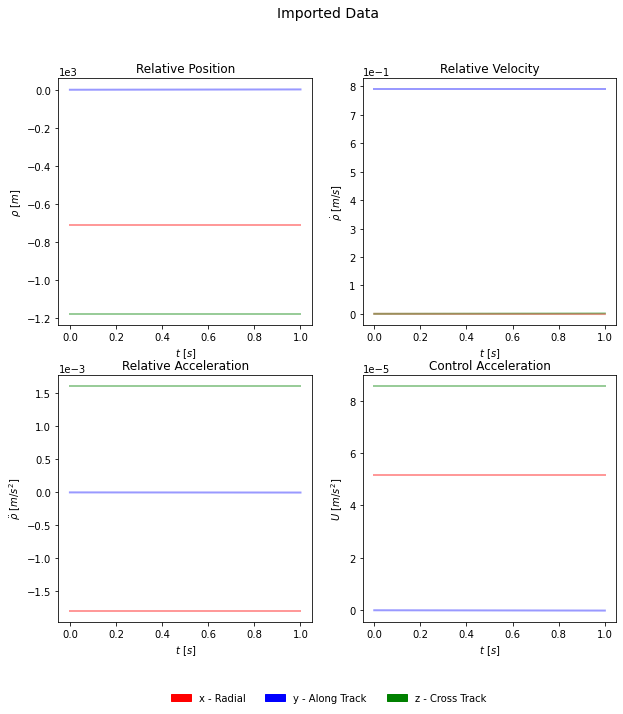

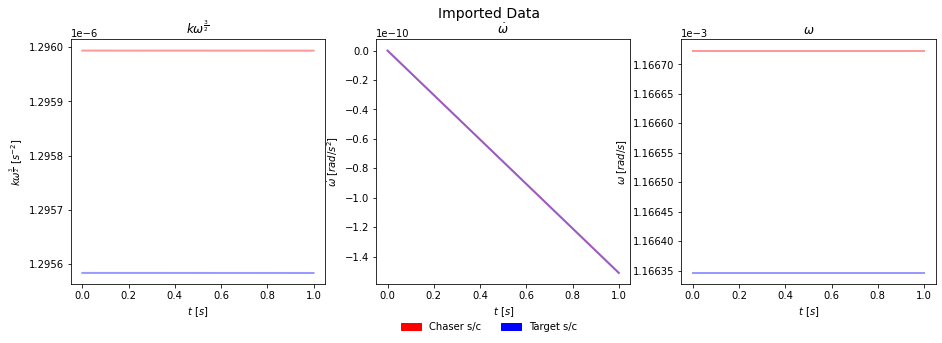

In [4]:
# Plot Imported Data
plot_kws = dict(linewidth=2)
red_patch = mpatches.Patch(color='red')
blue_patch = mpatches.Patch(color='blue')
green_patch = mpatches.Patch(color='green')

# figure 1: rho, rho_dot, rho_dotdot, a_f_RTH
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle('Imported Data', fontsize=14)
fig.legend(handles=[red_patch, blue_patch, green_patch],\
           labels=('x - Radial','y - Along Track','z - Cross Track'),\
           loc='lower center', frameon=False, ncol=3, bbox_to_anchor=(0.5, 0))

axs[0,0].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[0,0].plot(times, rho[:, 0], "r", alpha=0.4, **plot_kws)
axs[0,0].plot(times, rho[:, 1], "b", alpha=0.4, **plot_kws)
axs[0,0].plot(times, rho[:, 2], "g", alpha=0.4, **plot_kws)
axs[0,0].set_title('Relative Position')
if DataInSI_flag == 1:
    axs[0,0].set(xlabel="$t~[s]$", ylabel=r"$\rho~[m]$")
else:
    axs[0,0].set(xlabel="$t~[s]$", ylabel=r"$\rho~[km]$")
# axes[0].grid(True)

axs[0,1].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[0,1].plot(times, rho_dot[:, 0], "r", alpha=0.4, **plot_kws)
axs[0,1].plot(times, rho_dot[:, 1], "b", alpha=0.4, **plot_kws)
axs[0,1].plot(times, rho_dot[:, 2], "g", alpha=0.4, **plot_kws)
axs[0,1].set_title('Relative Velocity')
if DataInSI_flag == 1:
    axs[0,1].set(xlabel="$t~[s]$", ylabel=r"$\dot{\rho}~[m/s]$")
else:
    axs[0,1].set(xlabel="$t~[s]$", ylabel=r"$\dot{\rho}~[m/s]$")

axs[1,0].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[1,0].plot(times, rho_dotdot[:, 0], "r", alpha=0.4, **plot_kws)
axs[1,0].plot(times, rho_dotdot[:, 1], "b", alpha=0.4, **plot_kws)
axs[1,0].plot(times, rho_dotdot[:, 2], "g", alpha=0.4, **plot_kws)
axs[1,0].set_title('Relative Acceleration')
if DataInSI_flag == 1:
    axs[1,0].set(xlabel="$t~[s]$", ylabel=r"$\ddot{\rho}~[m/s^2]$")
else:
    axs[1,0].set(xlabel="$t~[s]$", ylabel=r"$\ddot{\rho}~[km/s^2]$")

axs[1,1].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[1,1].plot(times, a_f_RTH[:, 0], "r", alpha=0.4, **plot_kws)
axs[1,1].plot(times, a_f_RTH[:, 1], "b", alpha=0.4, **plot_kws)
axs[1,1].plot(times, a_f_RTH[:, 2], "g", alpha=0.4, **plot_kws)
axs[1,1].set_title('Control Acceleration')
if DataInSI_flag == 1:
    axs[1,1].set(xlabel="$t~[s]$", ylabel="$U~[m/s^2]$")
else:
    axs[1,1].set(xlabel="$t~[s]$", ylabel="$U~[km/s^2]$")


# figure 2: params_T, params_C
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15.5, 4.5))
fig.suptitle('Imported Data', fontsize=14)
fig.legend(handles=[red_patch, blue_patch],\
           labels=('Chaser s/c','Target s/c'),\
           loc='lower center', frameon=False, ncol=2, bbox_to_anchor=(0.5, -0.05))

axs[0].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[0].plot(times, params_C[:, 0], "r", alpha=0.4, **plot_kws)
axs[0].plot(times, params_T[:, 0], "b", alpha=0.4, **plot_kws)
axs[0].set_title(r"$k\omega^\frac{3}{2}$")
axs[0].set(xlabel="$t~[s]$", ylabel=r"$k\omega^\frac{3}{2}~[s^{-2}]$")
# axes[0].grid(True)

axs[1].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[1].plot(times, params_C[:, 1], "r", alpha=0.4, **plot_kws)
axs[1].plot(times, params_T[:, 1], "b", alpha=0.4, **plot_kws)
axs[1].set_title(r"$\dot{\omega}$")
axs[1].set(xlabel="$t~[s]$", ylabel=r"$\dot{\omega}~[rad/s^2]$")

axs[2].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[2].plot(times, params_C[:, 2], "r", alpha=0.4, **plot_kws)
axs[2].plot(times, params_T[:, 2], "b", alpha=0.4, **plot_kws)
axs[2].set_title(r"$\omega$")
axs[2].set(xlabel="$t~[s]$", ylabel=r"$\omega~[rad/s]$")



[Text(0.5, 0, '$t~[s]$'),
 Text(0, 0.5, '$\\widehat{k\\omega}^\\frac{3}{2}~[s^{-2}]$')]

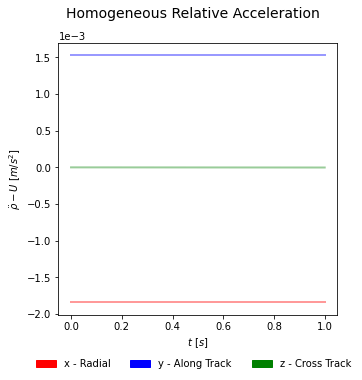

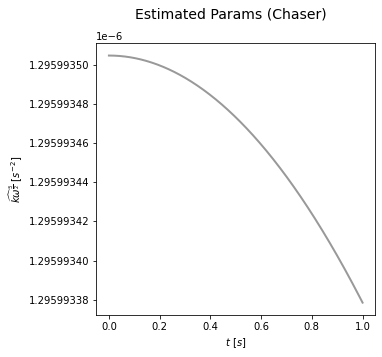

In [5]:
# Estimate Params from State Measurements
rho_dotdot_homogenous = rho_dotdot - a_f_RTH

fig = plt.figure(figsize=(5, 5))
fig.suptitle("Homogeneous Relative Acceleration", fontsize=14)
fig.legend(handles=[red_patch, blue_patch, green_patch],\
           labels=('x - Radial','y - Along Track','z - Cross Track'),\
           loc='lower center', frameon=False, ncol=3, bbox_to_anchor=(0.5, -0.05))

ax = plt.axes()
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
ax.plot(times, rho_dotdot_homogenous[:,0], "r", alpha=0.4, **plot_kws)
ax.plot(times, rho_dotdot_homogenous[:,1], "g", alpha=0.4, **plot_kws)
ax.plot(times, rho_dotdot_homogenous[:,2], "b", alpha=0.4, **plot_kws)
if DataInSI_flag == 1:
    ax.set(xlabel="$t~[s]$", ylabel=r"$\ddot{\rho}-U~[m/s^2]$")
else:
    ax.set(xlabel="$t~[s]$", ylabel=r"$\ddot{\rho}-U~[km/s^2]$")
    
est_kw32 = -1*np.divide(rho_dotdot_homogenous[:,2], rho[:,2])

fig = plt.figure(figsize=(5, 5))
fig.suptitle("Estimated Params (Chaser)", fontsize=14)
ax = plt.axes()
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
ax.plot(times, est_kw32, "k", alpha=0.4, **plot_kws)
ax.set(xlabel="$t~[s]$", ylabel=r"$\widehat{k\omega}^\frac{3}{2}~[s^{-2}]$")

In [6]:
measured_mean_kw32 = np.mean(est_kw32)

# Structure the data arrays
X = np.concatenate((rho, rho_dot[:,:-1]), axis=1)
X_dot = rho_dotdot_homogenous
T = times.reshape(-1) # 0 D Array

In [7]:
# Estimation of System Matrix --> Estimate Params
x_train = X
t_train = T
x_dot_precomputed = X_dot
N_ensembles = 150

dt = (t_train[1]-t_train[0])

# Formula :-
# afx -> (2*kw3_2 + w^2)*x,          dw*y,                0             0        2*w*vy
# afy ->      -dw*x,            (w^2 - kw3_2)*y,          0          -2*w*vx,       0
# afz ->        0                      0              -(kw3_2)*z,       0           0

identity_library = ps.IdentityLibrary()
identity_library.fit(X)

feature_names = ['x', 'y', 'z', 'vx', 'vy']
target_names = ['afx', 'afy', 'afz']

In [8]:
# Set Thresholds and Constraints:
n_features = identity_library.n_output_features_
n_targets = x_dot_precomputed.shape[1]
eps = 1e-12
print("n_targets = " + str(n_targets))
print("")
print("n_features = " + str(n_features))
print("")

# Thresholds:
# Each row corresponds to a Target and each column to a Library Feature
s = 1e30
#                         x       y       z       dx      dy      
a_thresholds = np.array([[1e-11,  1e-11,  s,  1e-11,      s],       # afx
                         [1e-11,  1e-11,  s,  1e-11,      s],       # afy
                         [s,      s,  1e-11,      s,      s]     ]) # afz

# Constraints:
constraint_rhs = np.array([eps, eps, eps, 0])

# One row per constraint, one column per coefficient
constraint_lhs = np.zeros((constraint_rhs.size, n_targets * n_features))

# Constraint 1: c1  - c5  +  3*c9  <= 1*eps
constraint_lhs[0,0] = 1  # c1
constraint_lhs[0,4] = -1 # c5
constraint_lhs[0,8] = 3  # c9

# Constraint 2: c4  + c2  <= 1*eps
constraint_lhs[1,3] = 1  # c4
constraint_lhs[1,1] = 1  # c2

# Constraint 3: c13 + c11 <= 1*eps
constraint_lhs[2,11] = 1  # c12
constraint_lhs[2,10] = 1  # c11

# Constraint 4: c11 <= 1*0
constraint_lhs[3,10] = 1  # c11

# Print:
print("Thresholds:" + str(a_thresholds.shape))
print(a_thresholds)
print("")
print("Constraints_LHS:" + str(constraint_lhs.shape))
print(constraint_lhs)
print("")
print("Constraints_RHS:" + str(constraint_rhs.shape))
print(constraint_rhs)

n_targets = 3

n_features = 5

Thresholds:(3, 5)
[[1.e-11 1.e-11 1.e+30 1.e-11 1.e+30]
 [1.e-11 1.e-11 1.e+30 1.e-11 1.e+30]
 [1.e+30 1.e+30 1.e-11 1.e+30 1.e+30]]

Constraints_LHS:(4, 15)
[[ 1.  0.  0.  0. -1.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]

Constraints_RHS:(4,)
[1.e-12 1.e-12 1.e-12 0.e+00]


In [9]:
# Set Thresholds and Constraints:
n_features = identity_library.n_output_features_
n_targets = x_dot_precomputed.shape[1]
eps = 1e-12
print("n_targets = " + str(n_targets))
print("")
print("n_features = " + str(n_features))
print("")

# Thresholds:
# Each row corresponds to a Target and each column to a Library Feature
s = 1e30
#                         x       y       z       dx      dy      
a_thresholds = np.array([[1e-11,  1e-11,  s,  1e-11,      s],       # afx
                         [1e-11,  1e-11,  s,  1e-11,      s],       # afy
                         [s,      s,  1e-11,      s,      s]     ]) # afz

# Constraints:
constraint_rhs = np.array([eps, eps, eps])

# One row per constraint, one column per coefficient
constraint_lhs = np.zeros((constraint_rhs.size, n_targets * n_features))

# Format:
# constraint_lhs[constraint_number, coefficient_of_which_feature + contribution_to_which_target*n_features] = coefficient_factor
# f:feature, t:target, C:coefficient --> C[f1/t3] = coefficient for contribution of f1 in t3

# constraint_lhs[Constraint_number_in_[constraint_rhs], {f?} + {t?}*n_features] = coefficient_multiplier  # c1

# Constraint 1: kw32
# 1*C[f1/t1] -1*C[f2/t2] +3*C[f3/t3] <= eps
constraint_lhs[0, 0 + 0*n_features] = 1
constraint_lhs[0, 1 + 1*n_features] = -1
constraint_lhs[0, 2 + 2*n_features] = 3

# Constraint 1: dw
# 1*C[f2/t1] +1*C[f1/t2] <= eps
constraint_lhs[1, 1 + 0*n_features] = 1
constraint_lhs[1, 0 + 1*n_features] = 1

# Constraint 1: w
# 1*C[f5/t1] +1*C[f4/t2] <= eps
constraint_lhs[2, 4 + 0*n_features] = 1  # c12
constraint_lhs[2, 3 + 1*n_features] = 1  # c11

# Print:
print("Thresholds:" + str(a_thresholds.shape))
print(a_thresholds)
print("")
print("Constraints_LHS:" + str(constraint_lhs.shape))
print(constraint_lhs)
print("")
print("Constraints_RHS:" + str(constraint_rhs.shape))
print(constraint_rhs)

n_targets = 3

n_features = 5

Thresholds:(3, 5)
[[1.e-11 1.e-11 1.e+30 1.e-11 1.e+30]
 [1.e-11 1.e-11 1.e+30 1.e-11 1.e+30]
 [1.e+30 1.e+30 1.e-11 1.e+30 1.e+30]]

Constraints_LHS:(3, 15)
[[ 1.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  3.  0.  0.]
 [ 0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]

Constraints_RHS:(3,)
[1.e-12 1.e-12 1.e-12]


In [10]:
# Model Fitting:
csr3_optimizer = ps.ConstrainedSR3(constraint_rhs=constraint_rhs, 
                                   constraint_lhs=constraint_lhs,
                                   thresholder="weighted_l1",
                                   tol=1e-16,
                                   max_iter=10000,
                                   normalize_columns=False,
                                   # initial_guess=initial_guess_trial,
                                   # trimming_fraction=0.1,
                                   fit_intercept=False,
                                   inequality_constraints = True,
                                   thresholds=a_thresholds,
)

model = ps.SINDy(feature_names = feature_names,
                 optimizer = csr3_optimizer,
                 feature_library = identity_library,
)

print(x_dot_precomputed.shape)

model.fit(x_train, 
          t=dt, 
          x_dot=x_dot_precomputed,
          # library_ensemble=True,
          ensemble=True,
          n_models=N_ensembles,
          # n_candidates_to_drop=1, 
          # unbias=True
          # quiet=True
)
    
print(model.coefficients())

ValueError: The thresholds argument cannot be used without a weighted thresholder, e.g. thresholder='weighted_l0'

In [ ]:
# Model_Coefs = model.coef_list
Model_Coefs = model.coefficients()

Sys_A = pandas.DataFrame(Model_Coefs, columns=feature_names, index=target_names)

print("Estimated System LTI Matrix --> Ensemble Bagged (Default Method):")
print("")
print(Sys_A)
print("")

In [ ]:
# Estimate Params from Estimated System Matrix (Model Coeficients List - for each ensemble estimate params)
def SysMat2Params(Model_Coefs):
    estimate_kw32 = -Model_Coefs[2,2]
    estimate_w = (Model_Coefs[4,0] - Model_Coefs[3,1])/4
    estimate_wdot = (Model_Coefs[0,1] - Model_Coefs[1,0])/2
    return (estimate_kw32, estimate_wdot, estimate_w)

print(SysMat2Params(Model_Coefs))

In [ ]:
estimate_kw32 = []
estimate_wdot = []
estimate_w = []

for ensembleIDX in range(len(model.coef_list)):
    (estim_kw32, estim_wdot, estim_w) = SysMat2Params(model.coef_list[ensembleIDX])
    estimate_kw32.append(estim_kw32)
    estimate_wdot.append(estim_wdot)
    estimate_w.append(estim_w)
    
estimate_params_C = np.stack((estimate_kw32, estimate_wdot, estimate_w), axis=1)

# figure 1: params_C
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15.5, 4.5))
fig.suptitle('Estimated Params From Estimated SysA For Each Ensemble', fontsize=14)
fig.legend(handles=[red_patch, blue_patch],\
           labels=('Chaser s/c','Target s/c'),\
           loc='lower center', frameon=False, ncol=2, bbox_to_anchor=(0.5, -0.05))

axs[0].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[0].plot(estimate_params_C[:, 0], "r", alpha=0.4, **plot_kws)
axs[0].set_title(r"$k\omega^\frac{3}{2}$")
axs[0].set(xlabel="$t~[s]$", ylabel=r"$k\omega^\frac{3}{2}~[s^{-2}]$")
# axes[0].grid(True)

axs[1].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[1].plot(estimate_params_C[:, 1], "r", alpha=0.4, **plot_kws)
axs[1].set_title(r"$\dot{\omega}$")
axs[1].set(xlabel="$t~[s]$", ylabel=r"$\dot{\omega}~[rad/s^2]$")

axs[2].ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
axs[2].plot(estimate_params_C[:, 2], "r", alpha=0.4, **plot_kws)
axs[2].set_title(r"$\omega$")
axs[2].set(xlabel="$t~[s]$", ylabel=r"$\omega~[rad/s]$")

In [ ]:
# Check if Estimated K is constant

Est_K = np.divide(estimate_params_C[:, 0], (-estimate_params_C[:, 2])**1.5)

fig = plt.figure(figsize=(5, 5))
fig.suptitle("Estimated Params (Chaser)", fontsize=14)
ax = plt.axes()
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0), useOffset=False)
ax.plot(Est_K, "k", alpha=0.4, **plot_kws)
ax.set(xlabel="$t~[s]$", ylabel=r"$k$")